# Разработка стратегии взаимодействия с клиентами сети фитнес-центров  для их удержания

Задача — провести анализ и подготовить план действий по удержанию клиентов фитнес-центра.  



[1  Загрузка и исследовательский анализ данных (EDA)](#1)   
[2  Построение модели прогнозирования оттока клиентов](#2)  
[2.1  Логистическая регрессия](#2.1)   
[2.2  Случайный лес](#2.2)   
[3  Кластеризация клиентов](#3)   
[3.1  Дендрограмма](#3.1)   
[3.2  Модель кластеризации на основании алгоритма K-Means](#3.2)   
[4  Выводы и рекомендации](#4)   
 

## Загрузка и исследовательский анализ данных (EDA)
<a id='1'></a>

В данных содержится информация на месяц до оттока и факт оттока на определённый месяц. Поле 'Churn' — факт оттока в текущем месяце. Клиент считается попавшим в отток, если за последний месяц ни разу не посетил спортзал;  
  
Информация в датасете:  
   
Данные клиента за предыдущий до проверки факта оттока месяц:  
'gender' — пол;  
'Near_Location' — проживание или работа в районе, где находится фитнес-центр;  
'Partner' — сотрудник компании-партнёра клуба;  
'Promo_friends' — клиент, пришедший в рамках акции «приведи друга»;  
'Phone' — наличие контактного телефона;  
'Age' — возраст;  
'Lifetime' — время в месяцах с момента первого обращения.  
  
Информация на основе журнала посещений, покупок и текущий статус абонемента клиента:  
'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
'Month_to_end_contract' — срок в месяцах до окончания текущего действующего абонемента;  
'Group_visits' — факт посещения групповых занятий;  
'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;  
'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;  
'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра (кафе, спорт-товары, косметический, массажный салон и т.д.).  

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

pd.options.display.max_columns = 200

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

print(gym.shape)
display(gym.head(10))

gym.info() 

gym.describe().T

(4000, 14)


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Все признаки численные, пропусков в данных нет.   
В среднем длительность текущего действующего абонемента составляет чуть больше четырех с половиной месяцев, при этом стандартное отклонение - 4,55, медианное значение - 1 месяц. Половина клиентов обратилась первый раз в фитнес-центр три месяца назад, а среднее количество месяцев с момента первого обращения 3,7 при стандартном отклонении 3,75. В среднем средняя частота посещений в неделю за все время с начала действия абонемента 1,88, стандартное отклонение - почти 1, а средняя частота посещений в неделю за предыдущий месяц немного меньше и составляет в среднем 1,77 со стандартным отклонением чуть больше единицы. Средний срок до окончания текущего действующего абонемента - 4,32 мес., а стандартное отклонение 4,2.    
Средний возраст клиентов составляет 29 лет. 

In [3]:
gym.columns = gym.columns.str.lower()
gym.groupby(['churn']).describe()

gender                                              near_location  \
        count      mean       std  min  25%  50%  75%  max         count   
churn                                                                      
0      2939.0  0.510037  0.499984  0.0  0.0  1.0  1.0  1.0        2939.0   
1      1061.0  0.510839  0.500118  0.0  0.0  1.0  1.0  1.0        1061.0   

                                                   partner            \
           mean       std  min  25%  50%  75%  max   count      mean   
churn                                                                  
0      0.873086  0.332933  0.0  1.0  1.0  1.0  1.0  2939.0  0.534195   
1      0.768143  0.422217  0.0  1.0  1.0  1.0  1.0  1061.0  0.355325   

                                         promo_friends                      \
            std  min  25%  50%  75%  max         count      mean       std   
churn                                                                        
0      0.498914  0.0  0.0  1.0  1.0  1.0        2939.0  0.353522  0.478144   
1      0.478837  0.0  0.0  0.0  1.0  1.0        1061.0  0.183789  0.387495   

                                 phone                                     \
       min  25%  50%  75%  max   count      mean       std  min  25%  50%   
churn                                                                       
0      0.0  0.0  0.0  1.0  1.0  2939.0  0.903709  0.295040  0.0  1.0  1.0   
1      0.0  0.0  0.0  0.0  1.0  1061.0  0.902922  0.296204  0.0  1.0  1.0   

                contract_period                                           \
       75%  max           count      mean       std  min  25%  50%   75%   
churn                                                                      
0      1.0  1.0          2939.0  5.747193  4.716942  1.0  1.0  6.0  12.0   
1      1.0  1.0          1061.0  1.728558  2.132371  1.0  1.0  1.0   1.0   

            group_visits                                                  age  \
        max        count      mean       std  min  25%  50%  75%  max   count   
churn                                                                           
0      12.0       2939.0  0.464103  0.498795  0.0  0.0  0.0  1.0  1.0  2939.0   
1      12.0       1061.0  0.268615  0.443448  0.0  0.0  0.0  1.0  1.0  1061.0   

                                                          \
            mean       std   min   25%   50%   75%   max   
churn                                                      
0      29.976523  3.009933  19.0  28.0  30.0  32.0  41.0   
1      26.989632  2.895163  18.0  25.0  27.0  29.0  38.0   

      avg_additional_charges_total                                   \
                             count        mean        std       min   
churn                                                                 
0                           2939.0  158.445715  99.801599  0.171862   
1                           1061.0  115.082899  77.696419  0.148205   

                                                    month_to_end_contract  \
             25%         50%         75%        max                 count   
churn                                                                       
0      76.920993  149.881171  224.448274  552.59074                2939.0   
1      50.629127  103.814686  165.616858  425.53522                1061.0   

                                                     lifetime            \
           mean       std  min  25%  50%   75%   max    count      mean   
churn                                                                     
0      5.283089  4.363522  1.0  1.0  6.0  10.0  12.0   2939.0  4.711807   
1      1.662582  1.964593  1.0  1.0  1.0   1.0  12.0   1061.0  0.990575   

                                          avg_class_frequency_total            \
            std  min  25%  50%  75%   max                     count      mean   
churn                                                                           
0      3.874780  0.0  2.0  4.0  6.0  31

В текущем месяце в отток попал 1061 клиент из 4000.  
Средний возраст ушедших клиентов 27 лет - почти на 3 года меньше среднего возраста оставшихся. В среднем длительность текущего действующего абонемента у тех, по кому зафиксирован факт оттока - 1,7 мес., а у активных клиентов - 5,7 мес., но стандартное отклонение более чем в два раза больше и составляет 4,7 мес.    
У клиентов, попавших в отток, время с момента первого обращения в фитнес-центр в среднем составляет 1 мес (против 4,7 у активных клиентов), а срок до окончания текущего действующего абонемента 1,66 мес.(против 5,3 у активных) со стандартным отклонением соответственно 1,1 и 2. При этом у 75% клиентов, попавших в отток, до конца окончания абонемента остался месяц, в то время как у 75% активных клиентов до конца срока 10 месяцев. 

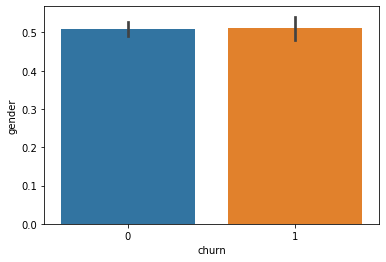

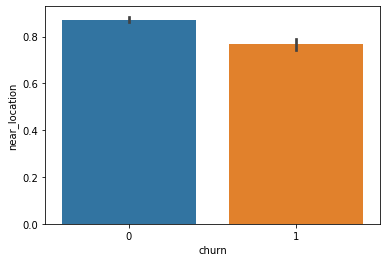

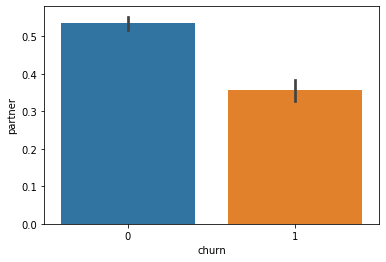

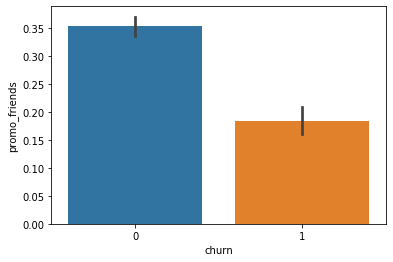

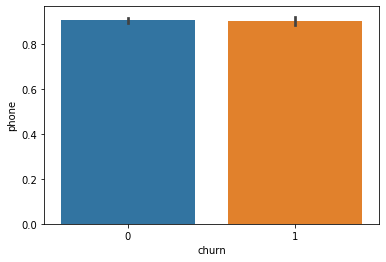

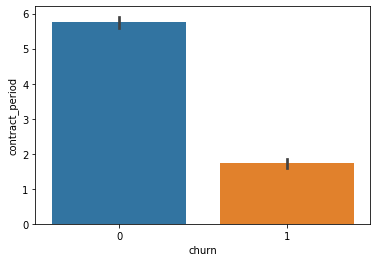

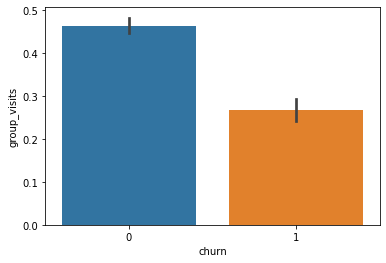

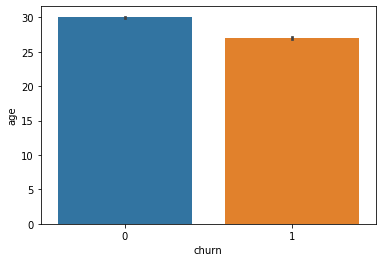

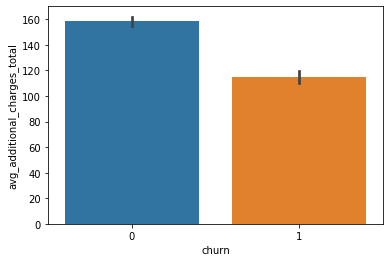

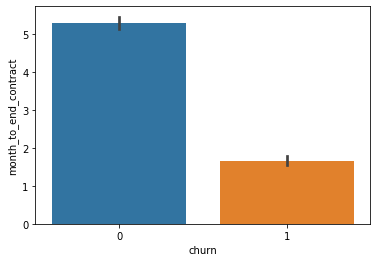

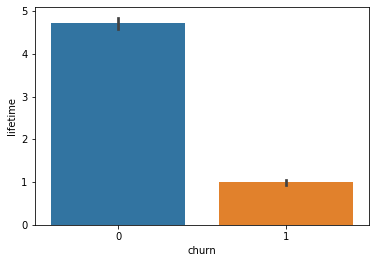

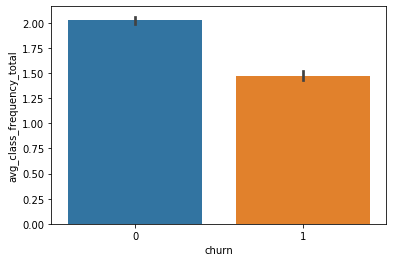

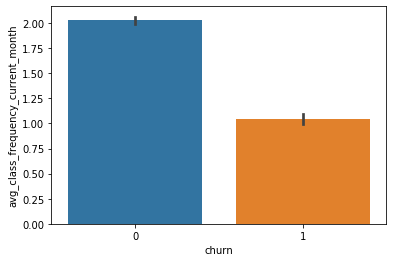

In [4]:
for col in gym.drop('churn', axis = 1).columns:
    sns.barplot(data=gym, x=gym['churn'], y=col)
    plt.show()

У клиентов, попавших в отток, длительность текущего действующего абонемента, срок до его окончания и время с момента первого обращения в фитнес-центр значительно меньше, чем у действующих клиентов. Также они в два раза реже посещали фитнес-центр в неделю за предыдущий месяц и принесли меньше суммарной выручки от других услуг фитнес-центра. 

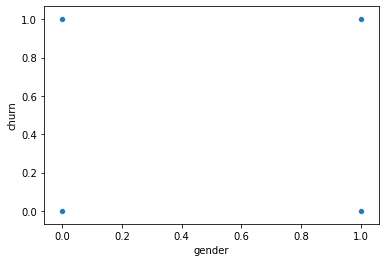

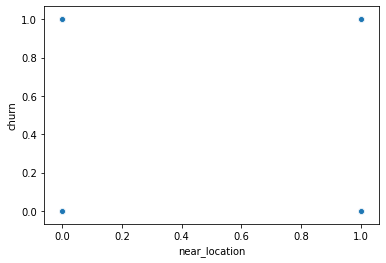

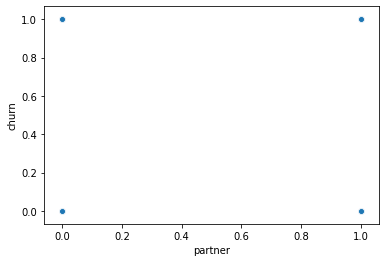

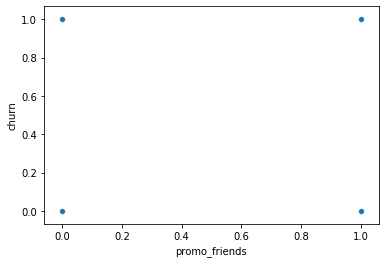

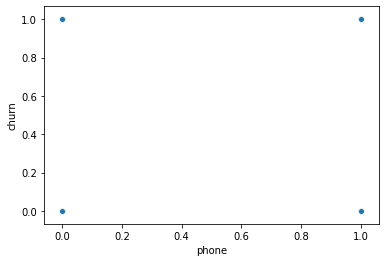

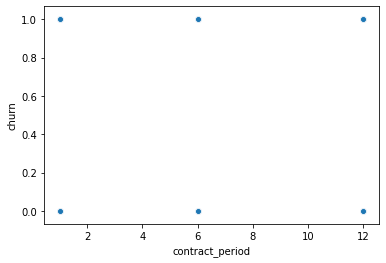

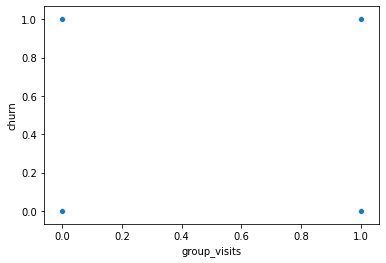

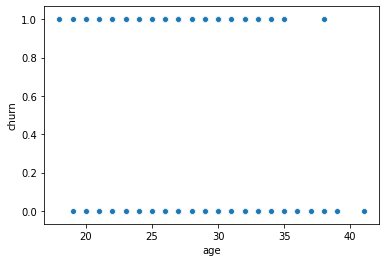

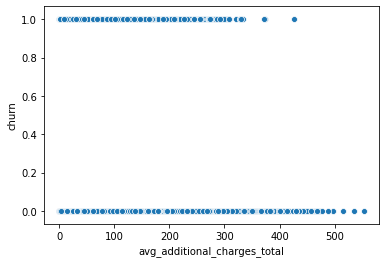

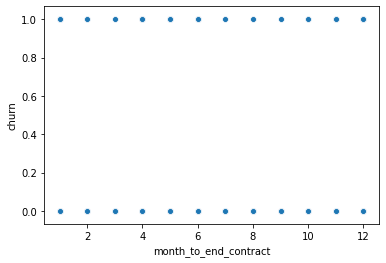

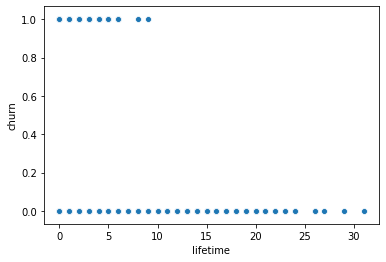

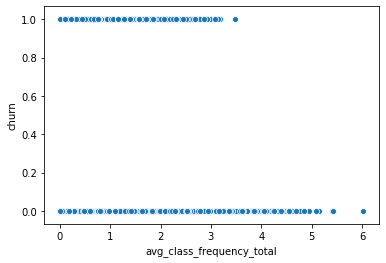

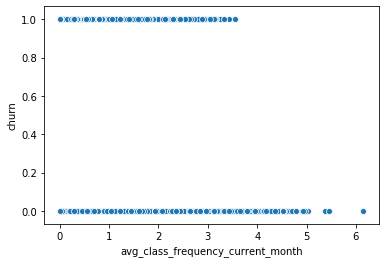

In [5]:
for col in gym.drop('churn', axis = 1).columns:
    sns.scatterplot(gym[col], gym['churn'])
    plt.show()

Ярких выбросов и перекосов по диаграммам рассеяния не наблюдается. 

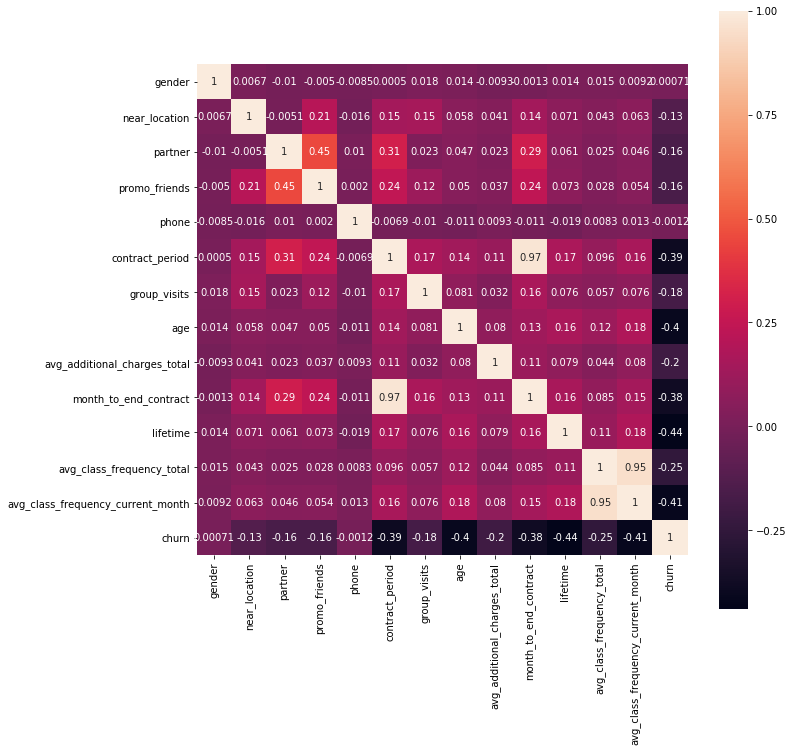

In [6]:
cm = gym.corr()
fig, ax = plt.subplots(figsize = (11, 11))
ax = sns.heatmap(cm, annot=True, square=True)  
plt.show()

Признаков, сильно коррелирующих с фактом оттока, нет. При этом ожидаемо между собой очень сильно коррелируют средняя частота посещений в неделю за все время с начала действия абонемента и за предыдущий месяц, а также длительность текущего действующего абонемента и срок до его окончания.

## Построение модели прогнозирования оттока клиентов
<a id='2'></a>

In [7]:
X = gym.drop('churn', axis = 1)
y = gym['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Логистическая регрессия
<a id='2.1'></a>

Так как классы не сбалансированы (1061 клиентов, попавших в отток против 2939 оставшихся), сместим порог вниз. Рассчитаем модели и метрики для порога 0.3 и 0.4

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

lr_model = LogisticRegression(solver='liblinear', random_state=0)

lr_model.fit(X_train_st, y_train)

lr_predictions = lr_model.predict(X_test_st)

lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

threshold = 0.4
threshold2 = 0.3

custom_predictions = [0 if i < threshold else 1 for i in lr_probabilities]
custom_predictions2 = [0 if i < threshold2 else 1 for i in lr_probabilities]

def metrics_print (pred):
    print('Accuracy: {:.2f}'.format(accuracy_score(y_test, pred)))
    print('Precision: {:.2f}'.format(precision_score(y_test, pred)))
    print('Recall: {:.2f}'.format(recall_score(y_test, pred)))
    print('F1: {:.2f}'.format(f1_score(y_test, pred)))
    
print('Метрики для прогноза с кастомным порогом', threshold)
metrics_print (custom_predictions)
print('Метрики для прогноза с кастомным порогом', threshold2)
metrics_print (custom_predictions2)

Метрики для прогноза с кастомным порогом 0.4
Accuracy: 0.92
Precision: 0.82
Recall: 0.86
F1: 0.84
Метрики для прогноза с кастомным порогом 0.3
Accuracy: 0.91
Precision: 0.77
Recall: 0.89
F1: 0.83


Модель, построенная с учетом порога в 0,3, выглядит более привлекательной, т.к. метрика recall заметно выше, а в ситуации, когда важно не упустить клиентов, которые  уйдут, лучше ориентироваться именно на метрику полноты.

### Случайный лес
<a id='2.2'></a>

In [9]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test) 
rf_probabilities = rf_model.predict_proba(X_test)[:, 1] 

metrics_print (rf_predictions)

Accuracy: 0.92
Precision: 0.84
Recall: 0.82
F1: 0.83


Обе модели работают довольно неплохо, в основном их метрики различаются незначительно. Но наиболее важная метрика recall ощутимо выше у модели, построенной с помощью логистической регрессии. Таким образом, на основании метрики полноты, модель логистической регрессии показала себя лучше.

In [10]:
lr_df = pd.DataFrame(
    data={'feature': X.columns, 'coeff': lr_model.coef_[0]}
)
lr_df['abs_coeff'] = abs(lr_df['coeff'])
print(lr_df.sort_values('abs_coeff', ascending=False))

print()

rf_df = pd.DataFrame(
    data={'feature': X.columns, 'importance': rf_model.feature_importances_}
)
print(rf_df.sort_values('importance', ascending=False))


                              feature     coeff  abs_coeff
12  avg_class_frequency_current_month -4.426492   4.426492
10                           lifetime -3.720057   3.720057
11          avg_class_frequency_total  3.290506   3.290506
7                                 age -1.074359   1.074359
5                     contract_period -0.703741   0.703741
8        avg_additional_charges_total -0.541020   0.541020
9               month_to_end_contract -0.520089   0.520089
6                        group_visits -0.385778   0.385778
3                       promo_friends -0.268180   0.268180
2                             partner -0.082845   0.082845
1                       near_location -0.075301   0.075301
0                              gender -0.013051   0.013051
4                               phone  0.005220   0.005220

                              feature  importance
10                           lifetime    0.276499
12  avg_class_frequency_current_month    0.180170
11          avg_class_f

Для обеих моделей наиболее важными признаками оказались время с момента первого обращения в фитнес-центр, средняя частота посещений в неделю за все время с начала действия абонемента и средняя частота посещений в неделю за предыдущий месяц.  

## Кластеризация клиентов
<a id='3'></a>

### Дендрограмма
<a id='3.1'></a>

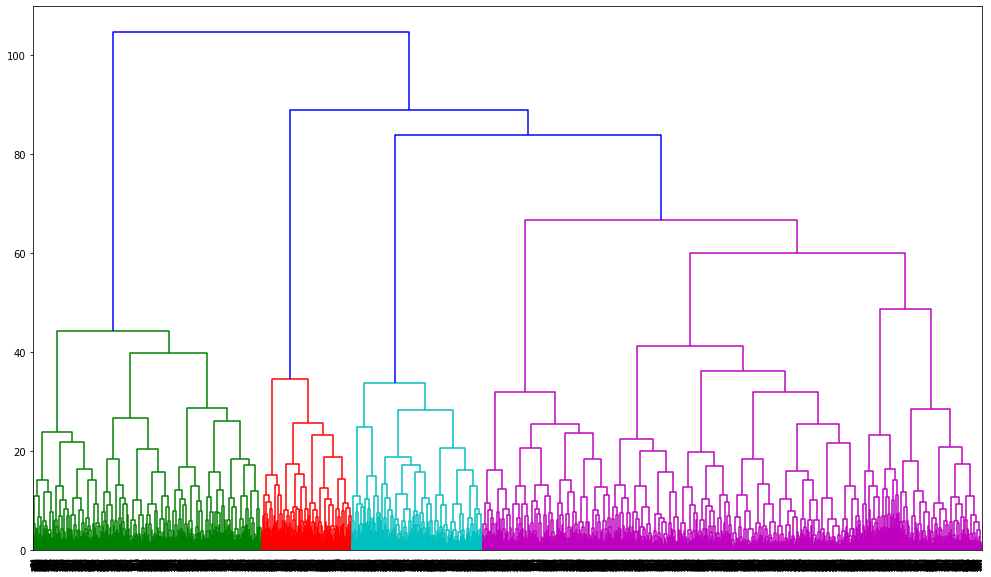

In [11]:
sc = StandardScaler() 
X_sc = sc.fit_transform(X) 
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(17, 10))  
dendrogram(linked, orientation='top')
plt.show() 

На основании дендрограммы можно сказать, что целесообразно выделить 4-6 кластеров.

### Модель кластеризации на основании алгоритма K-Means
<a id='3.2'></a>

In [12]:
km = KMeans(n_clusters = 5, random_state=0) 
labels = km.fit_predict(X_sc)
gym['cluster_km'] = labels

gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.502473,0.959446,0.783383,0.574679,1.000000,10.884273,0.543027,29.980218,160.706969,9.950544,4.738872,1.983305,1.976225,0.027695
1,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532
2,0.495050,0.000000,0.463366,0.079208,1.000000,2.352475,0.215842,28.477228,135.457501,2.198020,2.809901,1.660461,1.477324,0.443564
3,0.485737,1.000000,0.350238,0.240095,1.000000,1.948494,0.341521,28.167987,131.622204,1.856577,2.440571,1.247634,1.012983,0.514263
4,0.560335,0.976105,0.356033,0.229391,0.998805,2.665472,0.473118,30.127838,161.724258,2.455197,4.896057,2.851531,2.849473,0.068100


Можно заметить, что есть явное различие по некоторым кластерам в средних показателях времени с момента первого обращения в фитнес-центр, длительности текущего абонемента, срока до его окончания и суммарной выручки от других услуг фитнес-центра. При этом ни по полу, ни по возрасту клиентов существенных отличий между кластерами нет.

In [13]:
from sklearn.metrics import silhouette_score
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Silhouette_score: 0.14


Однако метрика силуэта, показывающая, насколько объект своего кластера похож на свой кластер больше, чем на чужой, не высокая.

In [14]:
print('Доля оттока клиентов по кластерам, %:') 
gym.groupby(['cluster_km'])['churn'].mean()*100

Доля оттока клиентов по кластерам, %:


cluster_km
0     2.769535
1    26.753247
2    44.356436
3    51.426307
4     6.810036
Name: churn, dtype: float64

Некоторые кластеры очень существенно отличаются по доле оттока.  
Наибольшая доля оттока (около половины клиентов) наблюдается в тех кластерах, где меньше всего средние значения суммарной выручки от доп.услуг фитнес-центра, времени с момента первого обращения в фитнес-центр, длительности текущего абонемента и срока до его окончания.  
В самом надежном кластере (меньше 3% оттока) клиенты в среднем тратят на доп.услуги больше всего денег, приобретают абонементы на долгий срок, на при этом с момента их первого обращения прошло в среднем больше 4 месяцев, а среднее количество месяцев до конца абонемента - почти 10. Кроме того, более половины клиентов наиболее надежного кластера пришли в рамках акции «приведи друга», тогда как в кластерах с самым большим оттоком таких гораздо меньше. А также клиенты из кластеров с меньшим оттоком в среднем примерно в два раза чаще посещают групповые занятия.

## Выводы и рекомендации
<a id='4'></a>

Модель, построенная на основе логистической регрессии, показывает лучший результат, чем алгоритм случайный лес, в прогнозировании факта оттока клиента в следующем месяце.  
По итогам кластеризации можно сделать вывод, что есть явное различие по некоторым кластерам в средних показателях времени с момента первого обращения в фитнес-центр, длительности текущего абонемента, срока до его окончания, суммарной выручки от других услуг фитнес-центра, а также посещения групповых занятий. При этом ни по полу, ни по возрасту клиентов существенных отличий между кластерами нет.  
Для уменьшения оттока клиентов можно попробовать реализовать следующие шаги:
- Заинтересовать клиентов в приобретении дополнительных услуг, в том числе, например, с помощью пробных бесплатных сеансов массажа/косметических процедур и т.п. или, наоборот, предоставляя, к примеру, пятый сеанс массажа в подарок при посещении четырех; накопительную скидку на приобретение спорттоваров и т.д.
- Стимулировать клиентов посещать групповые занятия, в том числе расширяя их виды и оптимизируя расписание
- Мотивировать клиентов приглашать друзей по программе "приведи друга"(предпочтительнее абонементы более полугода), предоставляя за каждого клиента какой-либо бонус
- Предлагать привлекательные условия продления абонементов, когда они подходят к концу, и заинтересовывать и новых, и постоянных клиентов в приобретении наиболее долгосрочных абонементов.  
  
И, конечно же, в целом обеспечивать максимально ненавязчивый, клиентоориентированый сервис. 
